### Lecture 3: Tempogram using autocorrelation of the spectral flux

One of the usefull representations for viewing tempo changes in recordings is the tempogram. In this notebook we create and visualize tempogram of a recording where tempo increases in time(varyingTempoBlues.mp3 in data/baris folder). There is no student version for this notebook.

In [1]:
import os
from essentia.standard import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import get_window
import IPython.display as ipd

In [2]:
def spectral_flux(x,windowSize,hopSize,winType="hann"):
    SF = 0
    w = Windowing(type = winType)
    spectrum = Spectrum(size = windowSize)
    prevAmpSpec = np.zeros((1 + int(windowSize / 2),))
    sf = []
    for frame in FrameGenerator(x, frameSize = windowSize, hopSize = hopSize):
        # STFT analysis
        ampSpec = spectrum(w(frame))
        sf.append(np.sum(np.abs(ampSpec-prevAmpSpec)))
        prevAmpSpec = ampSpec
    SF = np.array(sf[1:])#discard the first dummy value
    return SF

In [3]:
fileName='../data/baris/varyingTempoBlues.mp3'
fs = 44100
windowSize = 1024
hopSize = 256
x = MonoLoader(filename = fileName, sampleRate = fs)()
SF = spectral_flux(x,windowSize,hopSize)

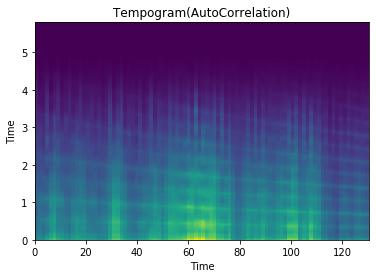

In [4]:
#Beat spectrogram computation from spectral flux
SFwindSize = 1000
SFhopSize = 250
startIndexes = np.arange(0, SF.size - SFwindSize, SFhopSize, dtype = int)
numWindows = startIndexes.size
beatSpec = np.array([]).reshape(0,SFwindSize)
w = get_window(('tukey', 0.5), SFwindSize)
for k in range(numWindows):
    startInd = startIndexes[k]
    SF_win = SF[startInd : startInd + SFwindSize] * w
    #Computing auto correlation
    autoCorr = np.zeros_like(SF_win, dtype = float)
    for k in range(1, SFwindSize - 1):
        SF_win_shifted = np.hstack((np.zeros(k),SF_win[:-k]))
        autoCorr[k] = np.dot(SF_win, SF_win_shifted)
    beatSpec = np.vstack((beatSpec, autoCorr))

#Plotting the spectrogram(matrix)
timeAx_x = np.arange(beatSpec.shape[0]) * (hopSize * SFhopSize) / float(fs)
timeAx_y = np.arange(beatSpec.shape[1]) * hopSize / float(fs)

plt.pcolormesh(timeAx_x, timeAx_y, np.transpose(beatSpec))
plt.xlim([0, timeAx_x[-1]])
plt.ylim([0, timeAx_y[-1]])
plt.title('Tempogram(AutoCorrelation)')
plt.ylabel('Time')
plt.xlabel('Time');

Listen to the audio file and observe tempo changes, relate to what you observe on the tempogram